# **Домашнее задание 3**

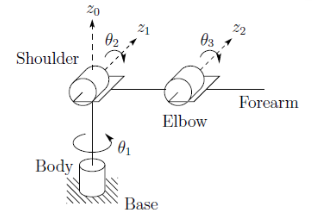

**Задание 1.** Вычислить  матрицу Якоби (классический способ, геометрический, численный) для трехзвенного манипулятора выше. Длины звенеьв можно считать равными $l_1=l_2=l_3=1$.

**Задание 2.** Построить траекторию при $\mathbf{q}(0)= [0^∘,0^∘,0^∘]$, $\mathbf{q}(2)= [30^∘,90^∘,180^∘]$ при нулевых начальных и конечных угловых скоростях и угловых ускорениях. Построить графики положения, скорости и ускорений шарниров.

**Задание 3.** При заданных начальных условиях

\begin{array}{|c|c|c|c|}
\hline
& \text{joint 1} & \text{joint 2} & \text{joint 3} \\
\hline
\text{начальное положение, $^\circ$} & 0 & 0 & 0\\
\hline
\text{конечное положение, $^\circ$} & 90 & 30 & 60 \\
\hline
\text{максимальная скорость, $^\circ$/c} & 5 & 4 & 3\\
\hline
\text{максимальное ускорение, $^\circ$/c$^2$} & 2 & 4 & 1\\
\hline
\end{array}


найти траекторию всех шарниров с минимальным затраченным временем. Выполнить синхронизацию движения всех трех шарниров. Построить графики положения, скорости и ускорения до и после синхронизации.


**Задание 4.** Построить траекторию с 4 промежуточными точками. Начальные и конечные значения положения возьмите из задания 3. Выбор промежуточных точек произвольный. Построить графики положения, скорости и ускорения.

**Задание 5.** Построить траекторию при переходе от точки к точке при заданных начальных и конечныx положениях энд-эффектора $p_0=[0,2,1]$, $p_f=[1.32,1.32,1.5]$. Максимальная линейная скорость - 1 м/с, максимальное линейное ускорение - 1 м/с$^2$. Построить графики положения, скорости и ускорения энд-эффектора (для решения вам потребуется посчитать обратную кинематику, а для вычисления скорости потребуется матрица Якоби). Построить графики положения и скорости всех шарниров.

**Задание 6**. Нарисовать с помощью matplotlib начальную, конечную конфигурации робота и путь, пройденный энд-эффектором, в предыдущем задании.


>**Важно!**
>
> Использование готовых библиотек запрещено, весь код должен быть написан с нуля.

> **Требования:**
>
> Вам необходимо отправить рабочий код (Python) и отчет. Можно использовать colab.
> Отчет должен содержать:
>
>- полученная матрица Якоби
- графики положения, скорости и ускорений шарниров для соответствующих пунктов.

>**Срок:**
>
>Работу необходимо отправить до **11.10 23:59**.

### REPORT INFO INCLUDED HERE

## Setup

In [291]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Union, Callable

np.set_printoptions(precision=3, suppress=True)

In [292]:
def rot_x(theta: float) -> np.ndarray:
    return np.array(
        [
            [1, 0, 0, 0],
            [0, np.cos(theta), -np.sin(theta), 0],
            [0, np.sin(theta), np.cos(theta), 0],
            [0, 0, 0, 1],
        ]
    )


def rot_y(theta: float) -> np.ndarray:
    return np.array(
        [
            [np.cos(theta), 0, np.sin(theta), 0],
            [0, 1, 0, 0],
            [-np.sin(theta), 0, np.cos(theta), 0],
            [0, 0, 0, 1],
        ]
    )


def rot_z(theta: float) -> np.ndarray:
    return np.array(
        [
            [np.cos(theta), -np.sin(theta), 0, 0],
            [np.sin(theta), np.cos(theta), 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
        ]
    )


def translate_x(d: float) -> np.ndarray:
    res = np.eye(4)
    res[0, 3] = d
    return res


def translate_y(d: float) -> np.ndarray:
    res = np.eye(4)
    res[1, 3] = d
    return res


def translate_z(d: float) -> np.ndarray:
    res = np.eye(4)
    res[2, 3] = d
    return res

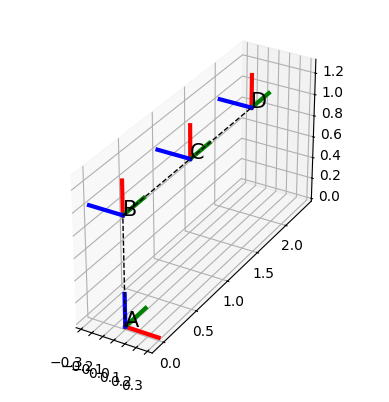

In [293]:
L_1 = L_2 = L_3 = 1.0


def forward_relative(qs: Union[list[float], np.ndarray]) -> list[np.ndarray]:
    if isinstance(qs, list):
        qs = np.array(qs, dtype=float)
    t_1 = rot_z(qs[0])
    t_2 = translate_z(L_1) @ rot_y(-np.pi / 2) @ rot_z(qs[1])
    t_3 = translate_y(L_2) @ rot_z(qs[2])
    t_4 = translate_y(L_3)
    return [t_1, t_2, t_3, t_4]


def forward(qs: Union[list[float], np.ndarray]) -> list[np.ndarray]:
    t_1, t_2, t_3, t_4 = forward_relative(qs)
    return [t_1, t_1 @ t_2, t_1 @ t_2 @ t_3, t_1 @ t_2 @ t_3 @ t_4]


def plot_configuration(
    ts: Union[list[np.ndarray], np.ndarray], axes_scale: float = 0.3, ax: Optional[plt.Axes] = None
):
    ax_given = bool(ax)
    ax = ax or plt.figure().add_subplot(projection="3d")
    axes_c = ["r", "g", "b"]

    # World frame
    world = np.eye(3)
    for i, c in zip(range(3), axes_c):
        ax.plot(
            *np.c_[np.zeros(3), axes_scale * world[:, i]],
            color=c,
            linewidth=3,
            alpha=0.3,
        )

    # Joint frames
    for t in ts:
        for i, c in zip(range(3), axes_c):
            ax.plot(
                *np.c_[t[:3, -1], axes_scale * t[:3, i] + t[:3, -1]],
                color=c,
                linewidth=3,
            )

    # Lines
    ax.plot(
        *np.c_[np.zeros(3), ts[0][:3, -1]],
        "--",
        color="black",
        linewidth=1,
    )
    for t_prev, t_next in zip(ts, ts[1:]):
        ax.plot(
            *np.c_[t_prev[:3, -1], t_next[:3, -1]],
            "--",
            color="black",
            linewidth=1,
        )

    # ax.text(0, 0, 0, "W", color="black", fontsize=15)
    for text, t in zip(list("ABCDEF"), ts):
        ax.text(*t[:3, -1], text, color="black", fontsize=15)
    ax.set_box_aspect([u - l for l, u in (getattr(ax, f"get_{a}lim")() for a in "xyz")])
    if not ax_given:
        plt.show()


plot_configuration(forward([0, 0, 0]))

In [294]:
def angle_between(a: np.ndarray, b: np.ndarray, n: np.ndarray) -> float:
    a = a / np.linalg.norm(a)
    b = b / np.linalg.norm(b)
    n = n / np.linalg.norm(n)
    if a.dot(b) > 1:
        return 0
    if a.dot(b) < -1:
        return np.pi
    sin_a = np.cross(a, b)
    alpha = np.arccos(a.dot(b))
    if n.dot(sin_a) >= 0:
        return alpha
    return -alpha


def backward(p_end: np.ndarray) -> list[np.ndarray]:
    x_e, y_e, z_e = p_end
    r_norm = np.sqrt(x_e**2 + y_e**2 + (z_e - L_1) ** 2)
    cos_alpha = (L_2**2 + L_3**2 - r_norm**2) / (2 * L_2 * L_3)
    if np.abs(cos_alpha) > 1:
        raise ValueError("Unreachable position for {p}!")
    alpha = np.arccos(cos_alpha)
    beta = np.arcsin(L_3 * np.sin(alpha) / r_norm)

    r_proj = np.array([x_e, y_e, 0])
    # TODO |r_proj| < epsilon
    if np.linalg.norm(r_proj) < 1e-9:
        z_2_1 = np.array([-1, 0, 0], dtype=float)
        z_2_2 = np.array([1, 0, 0], dtype=float)
        r = np.array([0, 1, 0], dtype=float)
    else:
        r_proj = r_proj / np.linalg.norm(r_proj)
        r = np.array([x_e, y_e, z_e - L_1])
        r = r / np.linalg.norm(r)
        z_2_1 = rot_z(np.pi / 2)[:3, :3] @ r_proj
        z_2_2 = rot_z(-np.pi / 2)[:3, :3] @ r_proj

    r_2_a = np.eye(3)
    r_2_b = np.eye(3)
    r_2_a[:, 0] = np.cross(r, z_2_1)
    r_2_b[:, 0] = np.cross(r, z_2_2)
    r_2_a[:, 1] = r
    r_2_b[:, 1] = r
    r_2_a[:, 2] = z_2_1
    r_2_b[:, 2] = z_2_2
    r_2_1 = r_2_a @ rot_z(beta)[:3, :3]
    r_2_2 = r_2_a @ rot_z(-beta)[:3, :3]
    r_2_3 = r_2_b @ rot_z(beta)[:3, :3]
    r_2_4 = r_2_b @ rot_z(-beta)[:3, :3]

    # Compute q_1
    base_z = rot_y(-np.pi / 2)[:3, 2]
    q_1_1 = angle_between(base_z, z_2_1, np.array([0, 0, 1], dtype=float))
    q_1_2 = angle_between(base_z, z_2_2, np.array([0, 0, 1], dtype=float))

    # Compute q_2
    y_2_1 = rot_z(-np.pi / 2)[:3, :3] @ z_2_1
    y_2_2 = rot_z(-np.pi / 2)[:3, :3] @ z_2_2
    q_2_1 = angle_between(y_2_1, r_2_1[:,1], z_2_1)
    q_2_2 = angle_between(y_2_1, r_2_2[:,1], z_2_1)
    q_2_3 = angle_between(y_2_2, r_2_3[:,1], z_2_2)
    q_2_4 = angle_between(y_2_2, r_2_4[:,1], z_2_2)

    # Compute q_3
    p_3_1 = r_2_1[:, 1] * L_2 + np.array([0, 0, L_1])
    p_3_2 = r_2_2[:, 1] * L_2 + np.array([0, 0, L_1])
    p_3_3 = r_2_3[:, 1] * L_2 + np.array([0, 0, L_1])
    p_3_4 = r_2_4[:, 1] * L_2 + np.array([0, 0, L_1])
    y_3_1 = (p_end - p_3_1) / np.linalg.norm(p_end - p_3_1)
    y_3_2 = (p_end - p_3_2) / np.linalg.norm(p_end - p_3_2)
    y_3_3 = (p_end - p_3_3) / np.linalg.norm(p_end - p_3_3)
    y_3_4 = (p_end - p_3_4) / np.linalg.norm(p_end - p_3_4)

    q_3_1 = angle_between(r_2_1[:,1], y_3_1, z_2_1)
    q_3_2 = angle_between(r_2_2[:,1], y_3_2, z_2_1)
    q_3_3 = angle_between(r_2_3[:,1], y_3_3, z_2_2)
    q_3_4 = angle_between(r_2_4[:,1], y_3_4, z_2_2)

    return [
        np.array([q_1_1, q_2_1, q_3_1]),
        np.array([q_1_1, q_2_2, q_3_2]),
        np.array([q_1_2, q_2_3, q_3_3]),
        np.array([q_1_2, q_2_4, q_3_4]),
    ]


def test_backward(n: int = 1000, threshold: float = 1e-3):
    for i in range(n):
        qs = 2 * np.pi * np.random.rand(3) - np.pi
        ts = forward(qs)
        p_end = ts[-1][:3, 3]
        sols = backward(p_end)
        for sol in sols:
            ts_sol = forward(sol)
            p_end_sol = ts_sol[-1][:3, 3]
            assert np.abs(p_end - p_end_sol).mean() < threshold

test_backward(n=500)

## Task 1

### Geometrical approach
Hint: A Mathematical Introduction to Robotic Manipulation by Richard M. Murray

In [295]:
def rot_x_jac() -> np.ndarray:
    return np.array([0, 0, 0, 1, 0, 0], dtype=float)


def rot_y_jac() -> np.ndarray:
    return np.array([0, 0, 0, 0, 1, 0], dtype=float)


def rot_z_jac() -> np.ndarray:
    return np.array([0, 0, 0, 0, 0, 1], dtype=float)


def translate_x_jac() -> np.ndarray:
    return np.array([1, 0, 0, 0, 0, 0], dtype=float)


def translate_y_jac() -> np.ndarray:
    return np.array([0, 1, 0, 0, 0, 0], dtype=float)


def translate_z_jac() -> np.ndarray:
    return np.array([0, 0, 1, 0, 0, 0], dtype=float)


def skew3d(x: np.ndarray) -> np.ndarray:
    return np.array([[0, -x[2], x[1]], [x[2], 0, -x[0]], [-x[1], x[0], 0]])


def adjoint(t: np.ndarray) -> np.ndarray:
    res = np.zeros((6, 6))
    res[:3, :3] = t[:3, :3]
    res[3:, 3:] = t[:3, :3]
    res[:3, 3:] = skew3d(t[:3, 3]) @ t[:3, :3]
    return res

In [296]:
def to_world_align(jac: np.ndarray, t: np.ndarray) -> np.ndarray:
    res = jac.copy()
    if len(res.shape) == 1:
        res = np.expand_dims(res, axis=1)
    res[:3] -= skew3d(t[:3, 3]) @ res[3:]
    return res


def complete_jac(jac: np.ndarray, nv: int) -> np.ndarray:
    if len(jac.shape) == 1:
        add_n = nv - 1
    else:
        add_n = nv - jac.shape[1]

    if add_n == 0:
        return jac.copy()
    if add_n < 0:
        return jac.copy()[:, :add_n]
    return np.c_[jac, np.zeros((6, add_n))]


def combine_jacobians(
    jac_parent: Optional[np.ndarray], jac_child: np.ndarray, t: np.ndarray
) -> np.ndarray:
    if len(jac_child.shape) == 1:
        jac_child = np.expand_dims(jac_child, axis=1)
    return np.c_[jac_parent, adjoint(t) @ jac_child]


def rel_jacs() -> list[np.ndarray]:
    jac_1 = rot_z_jac()
    jac_2 = adjoint(translate_z(L_1) @ rot_y(-np.pi / 2)) @ rot_z_jac()
    jac_3 = adjoint(translate_y(L_2)) @ rot_z_jac()
    return [jac_1, jac_2, jac_3, np.zeros(6)]


def get_jacobians_geom(qs: Union[list[float], np.ndarray]) -> np.ndarray:
    ts = forward(qs)
    jacs = rel_jacs()

    raw_jac_1 = jacs[0]
    raw_jac_2 = combine_jacobians(raw_jac_1, jacs[1], ts[0])
    raw_jac_3 = combine_jacobians(raw_jac_2, jacs[2], ts[1])
    raw_jac_4 = combine_jacobians(raw_jac_3, jacs[3], ts[2])

    jac_1 = complete_jac(to_world_align(raw_jac_1, ts[0]), 3)
    jac_2 = complete_jac(to_world_align(raw_jac_2, ts[1]), 3)
    jac_3 = complete_jac(to_world_align(raw_jac_3, ts[2]), 3)
    jac_4 = complete_jac(to_world_align(raw_jac_4, ts[3]), 3)

    return [jac_1, jac_2, jac_3, jac_4]


get_jacobians_geom([0, -np.pi / 2, 0])

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.]]),
 array([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0., -1.,  0.],
        [ 0.,  0.,  0.],
        [ 1.,  0.,  0.]]),
 array([[-0., -0.,  0.],
        [ 0.,  1.,  0.],
        [ 0., -0.,  0.],
        [ 0., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  0.,  0.]]),
 array([[-0., -0., -0.],
        [ 0.,  2.,  1.],
        [ 0., -0., -0.],
        [ 0., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  0.,  0.]])]

### Classical approach

Using rotations matrices we can obtain:
* $T_1 = \left[\begin{matrix}\cos{\left(q_{1} \right)} & - \sin{\left(q_{1} \right)} & 0 & 0\\\sin{\left(q_{1} \right)} & \cos{\left(q_{1} \right)} & 0 & 0\\0 & 0 & 1 & 0\\0 & 0 & 0 & 1\end{matrix}\right]$
* $T_2 = \left[\begin{matrix}- \sin{\left(q_{1} \right)} \sin{\left(q_{2} \right)} & - \sin{\left(q_{1} \right)} \cos{\left(q_{2} \right)} & - \cos{\left(q_{1} \right)} & 0\\\sin{\left(q_{2} \right)} \cos{\left(q_{1} \right)} & \cos{\left(q_{1} \right)} \cos{\left(q_{2} \right)} & - \sin{\left(q_{1} \right)} & 0\\\cos{\left(q_{2} \right)} & - \sin{\left(q_{2} \right)} & 0 & l_{1}\\0 & 0 & 0 & 1\end{matrix}\right]$
* $T_3 = \left[\begin{matrix}- \sin{\left(q_{1} \right)} \sin{\left(q_{2} + q_{3} \right)} & - \sin{\left(q_{1} \right)} \cos{\left(q_{2} + q_{3} \right)} & - \cos{\left(q_{1} \right)} & - l_{2} \sin{\left(q_{1} \right)} \cos{\left(q_{2} \right)}\\\sin{\left(q_{2} + q_{3} \right)} \cos{\left(q_{1} \right)} & \cos{\left(q_{1} \right)} \cos{\left(q_{2} + q_{3} \right)} & - \sin{\left(q_{1} \right)} & l_{2} \cos{\left(q_{1} \right)} \cos{\left(q_{2} \right)}\\\cos{\left(q_{2} + q_{3} \right)} & - \sin{\left(q_{2} + q_{3} \right)} & 0 & l_{1} - l_{2} \sin{\left(q_{2} \right)}\\0 & 0 & 0 & 1\end{matrix}\right]$
* $T_4 = \left[\begin{matrix}- \sin{\left(q_{1} \right)} \sin{\left(q_{2} + q_{3} \right)} & - \sin{\left(q_{1} \right)} \cos{\left(q_{2} + q_{3} \right)} & - \cos{\left(q_{1} \right)} & - \left(l_{2} \cos{\left(q_{2} \right)} + l_{3} \cos{\left(q_{2} + q_{3} \right)}\right) \sin{\left(q_{1} \right)}\\\sin{\left(q_{2} + q_{3} \right)} \cos{\left(q_{1} \right)} & \cos{\left(q_{1} \right)} \cos{\left(q_{2} + q_{3} \right)} & - \sin{\left(q_{1} \right)} & \left(l_{2} \cos{\left(q_{2} \right)} + l_{3} \cos{\left(q_{2} + q_{3} \right)}\right) \cos{\left(q_{1} \right)}\\\cos{\left(q_{2} + q_{3} \right)} & - \sin{\left(q_{2} + q_{3} \right)} & 0 & l_{1} - l_{2} \sin{\left(q_{2} \right)} - l_{3} \sin{\left(q_{2} + q_{3} \right)}\\0 & 0 & 0 & 1\end{matrix}\right]$

Now we can easily obtain angular Jacobians:
* $J_{\omega_1} = \left[\begin{matrix}0 & 0 & 0\\0 & 0 & 0\\1 & 0 & 0\end{matrix}\right]$
* $J_{\omega_2} = \left[\begin{matrix}0 & - \cos{\left(q_{1} \right)} & 0\\0 & - \sin{\left(q_{1} \right)} & 0\\1 & 0 & 0\end{matrix}\right]$
* $J_{\omega_3} = J_{\omega_4} = \left[\begin{matrix}0 & - \cos{\left(q_{1} \right)} & - \cos{\left(q_{1} \right)}\\0 & - \sin{\left(q_{1} \right)} & - \sin{\left(q_{1} \right)}\\1 & 0 & 0\end{matrix}\right]$

Velocities Jacobians can be obtained by differencing a frame positions:
* $J_{\upsilon_1} = J_{\upsilon_2} = \left[\begin{matrix}0 & 0 & 0\\0 & 0 & 0\\0 & 0 & 0\end{matrix}\right]$
* $J_{\upsilon_3} = \left[\begin{matrix}- l_{2} \cos{\left(q_{1} \right)} \cos{\left(q_{2} \right)} & l_{2} \sin{\left(q_{1} \right)} \sin{\left(q_{2} \right)} & 0\\- l_{2} \sin{\left(q_{1} \right)} \cos{\left(q_{2} \right)} & - l_{2} \sin{\left(q_{2} \right)} \cos{\left(q_{1} \right)} & 0\\0 & - l_{2} \cos{\left(q_{2} \right)} & 0\end{matrix}\right]$
* $J_{\upsilon_4} = \left[\begin{matrix}- \left(l_{2} \cos{\left(q_{2} \right)} + l_{3} \cos{\left(q_{2} + q_{3} \right)}\right) \cos{\left(q_{1} \right)} & \left(l_{2} \sin{\left(q_{2} \right)} + l_{3} \sin{\left(q_{2} + q_{3} \right)}\right) \sin{\left(q_{1} \right)} & l_{3} \sin{\left(q_{1} \right)} \sin{\left(q_{2} + q_{3} \right)}\\- \left(l_{2} \cos{\left(q_{2} \right)} + l_{3} \cos{\left(q_{2} + q_{3} \right)}\right) \sin{\left(q_{1} \right)} & - \left(l_{2} \sin{\left(q_{2} \right)} + l_{3} \sin{\left(q_{2} + q_{3} \right)}\right) \cos{\left(q_{1} \right)} & - l_{3} \sin{\left(q_{2} + q_{3} \right)} \cos{\left(q_{1} \right)}\\0 & - l_{2} \cos{\left(q_{2} \right)} - l_{3} \cos{\left(q_{2} + q_{3} \right)} & - l_{3} \cos{\left(q_{2} + q_{3} \right)}\end{matrix}\right]$

In [297]:
def get_jac_anl_1(q_1: float) -> np.ndarray:
    return np.array(
        [
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            [1, 0, 0],
        ]
    )


def get_jac_anl_2(q_1: float) -> np.ndarray:
    return np.array(
        [
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            [0, -np.cos(q_1), 0],
            [0, -np.sin(q_1), 0],
            [1, 0, 0],
        ]
    )


def get_jac_anl_3(q_1: float, q_2: float) -> np.ndarray:
    return np.array(
        [
            [-L_2 * np.cos(q_1) * np.cos(q_2), L_2 * np.sin(q_1) * np.sin(q_2), 0],
            [-L_2 * np.sin(q_1) * np.cos(q_2), -L_2 * np.sin(q_2) * np.cos(q_1), 0],
            [0, -L_2 * np.cos(q_2), 0],
            [0, -np.cos(q_1), -np.cos(q_1)],
            [0, -np.sin(q_1), -np.sin(q_1)],
            [1, 0, 0],
        ]
    )


def get_jac_anl_4(q_1: float, q_2: float, q_3: float) -> np.ndarray:
    return np.array(
        [
            [
                -(L_2 * np.cos(q_2) + L_3 * np.cos(q_2 + q_3)) * np.cos(q_1),
                (L_2 * np.sin(q_2) + L_3 * np.sin(q_2 + q_3)) * np.sin(q_1),
                L_3 * np.sin(q_1) * np.sin(q_2 + q_3),
            ],
            [
                -(L_2 * np.cos(q_2) + L_3 * np.cos(q_2 + q_3)) * np.sin(q_1),
                -(L_2 * np.sin(q_2) + L_3 * np.sin(q_2 + q_3)) * np.cos(q_1),
                -L_3 * np.sin(q_2 + q_3) * np.cos(q_1),
            ],
            [0, -L_2 * np.cos(q_2) - L_3 * np.cos(q_2 + q_3), -L_3 * np.cos(q_2 + q_3)],
            [0, -np.cos(q_1), -np.cos(q_1)],
            [0, -np.sin(q_1), -np.sin(q_1)],
            [1, 0, 0],
        ]
    )



def get_jacobians_classic(qs: Union[list[float], np.ndarray]) -> list[np.ndarray]:
    if isinstance(qs, list):
        qs = np.array(qs, dtype=float)
    return [
        get_jac_anl_1(qs[0]),
        get_jac_anl_2(qs[0]),
        get_jac_anl_3(qs[0], qs[1]),
        get_jac_anl_4(qs[0], qs[1], qs[2]),
    ]

get_jacobians_classic([0, -np.pi / 2, 0])

[array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [1, 0, 0]]),
 array([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0., -1.,  0.],
        [ 0., -0.,  0.],
        [ 1.,  0.,  0.]]),
 array([[-0., -0.,  0.],
        [-0.,  1.,  0.],
        [ 0., -0.,  0.],
        [ 0., -1., -1.],
        [ 0., -0., -0.],
        [ 1.,  0.,  0.]]),
 array([[-0., -0., -0.],
        [-0.,  2.,  1.],
        [ 0., -0., -0.],
        [ 0., -1., -1.],
        [ 0., -0., -0.],
        [ 1.,  0.,  0.]])]

### Numerical

In [298]:
def deSkew3d(x: np.ndarray) -> np.ndarray:
    return np.array([x[2, 1], x[0, 2], x[1, 0]])


def get_i_col_ang_jac(t_1: np.ndarray, t_2: np.ndarray, dq: float) -> np.ndarray:
    R = t_1[:3, :3]
    dR = (t_2 - t_1)[:3, :3] / dq
    return deSkew3d(dR @ R.T)


def get_ang_jac(qs: Union[list[float], np.ndarray], dq: float, idx: int) -> np.ndarray:
    if isinstance(qs, list):
        qs = np.array(qs, dtype=float)
    res = np.zeros((3, 3))
    t_1 = forward(qs)[idx]
    for i in range(3):
        qs_changed = qs.copy()
        qs_changed[i] += dq
        t_2 = forward(qs_changed)[idx]
        res[:, i] = get_i_col_ang_jac(t_1, t_2, dq)
    return res


def get_vel_jac(qs: Union[list[float], np.ndarray], dq: float, idx: int) -> np.ndarray:
    if isinstance(qs, list):
        qs = np.array(qs, dtype=float)
    res = np.zeros((3, 3))
    t_1 = forward(qs)[idx]
    for i in range(3):
        qs_changed = qs.copy()
        qs_changed[i] += dq
        t_2 = forward(qs_changed)[idx]
        res[:, i] = (t_2 - t_1)[:3, 3] / dq
    return res


def get_jacobians_num(
    qs: Union[list[float], np.ndarray], dq: float = 1e-3
) -> list[np.ndarray]:
    if isinstance(qs, list):
        qs = np.array(qs, dtype=float)
    jacs = []
    for idx in range(4):
        jacs.append(np.r_[get_vel_jac(qs, dq, idx), get_ang_jac(qs, dq, idx)])
    return jacs

get_jacobians_num([0, -np.pi / 2, 0])

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [1., 0., 0.]]),
 array([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0., -1.,  0.],
        [-0., -0.,  0.],
        [ 1.,  0.,  0.]]),
 array([[-0., -0.,  0.],
        [ 0.,  1.,  0.],
        [ 0., -0.,  0.],
        [ 0., -1., -1.],
        [-0., -0., -0.],
        [ 1.,  0.,  0.]]),
 array([[-0.   , -0.   , -0.   ],
        [ 0.   ,  2.   ,  1.   ],
        [ 0.   , -0.001, -0.   ],
        [ 0.   , -1.   , -1.   ],
        [-0.   , -0.   , -0.   ],
        [ 1.   ,  0.   ,  0.   ]])]

### Check

In [299]:
def test_jacs_calc(n: int = 1000, threshold: float = 1e-3):
    for i in range(n):
        qs = 2 * np.pi * np.random.rand(3) - np.pi
        jacs_1 = get_jacobians_classic(qs)
        jacs_2 = get_jacobians_geom(qs)
        jacs_3 = get_jacobians_num(qs)
        for jac_1, jac_2, jac_3 in zip(jacs_1, jacs_2, jacs_3):
            error_1 = np.abs(jac_1 - jac_2).mean()
            error_2 = np.abs(jac_2 - jac_3).mean()
            assert error_1 < threshold
            assert error_2 < threshold

test_jacs_calc(n=500)

## Task 2

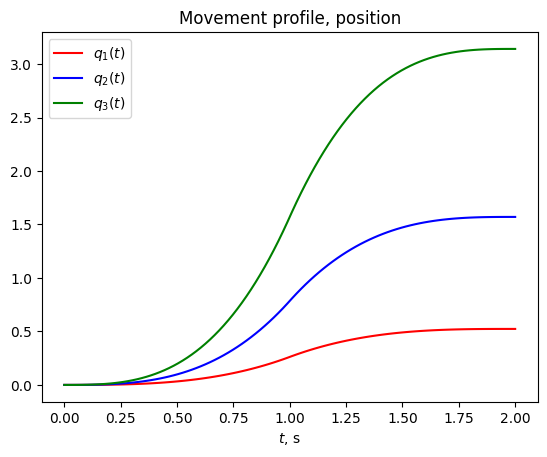

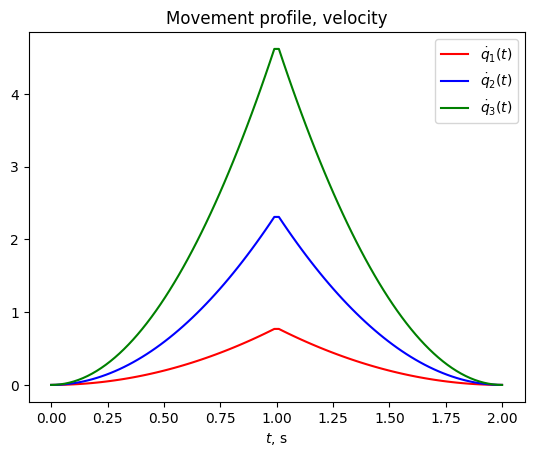

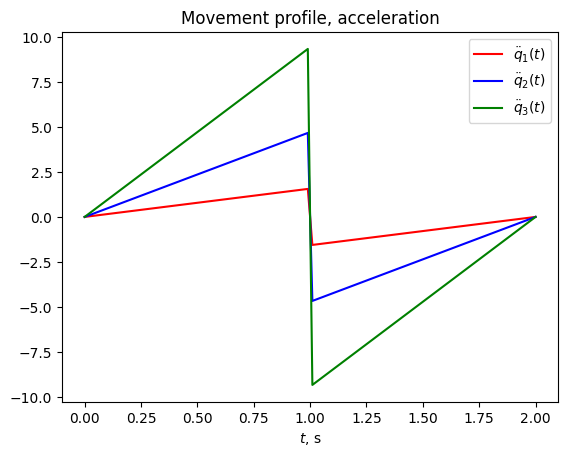

In [300]:
def get_jerk(t: float, q: float) -> float:
    return 6 * q / t**3


def get_jerk_profile(
    t_1: float, t_2: float, q_1: float, q_2: float
) -> Callable[[float], tuple[float, float, float]]:
    assert t_1 < t_2

    t_mid = (t_1 + t_2) / 2
    q_mid = (q_1 + q_2) / 2
    jerk = get_jerk(t_mid - t_1, q_mid - q_1)

    def profile(t: float):
        if t <= t_1:
            return q_1, 0, 0
        if t <= t_mid:
            return (
                (jerk / 6) * (t - t_1) ** 3 + q_1,
                (jerk / 2) * (t - t_1) ** 2,
                jerk * (t - t_1),
            )
        if t <= t_2:
            return (
                (jerk / 6) * (t - t_2) ** 3 + q_2,
                (jerk / 2) * (t - t_2) ** 2,
                jerk * (t - t_2),
            )
        return q_2, 0, 0

    return profile


def get_trajectory(t_span: np.ndarray, profile: Callable[[float], float]) -> np.ndarray:
    return np.array([profile(x) for x in t_span])


def draw_path(
    t_span: np.ndarray,
    profiles: list[Callable[[float], float]],
    plot_positions: bool = False,
    plot_configuration: bool = False,
):
    qs = np.array([get_trajectory(t_span, p) for p in profiles])

    # Plot profiles
    suffixes = ["position", "velocity", "acceleration"]
    q_prefixes = ["q", "\dot{q}", "\ddot{q}"]
    for i, (suffix, prefix) in enumerate(zip(suffixes, q_prefixes)):
        plt.title(f"Movement profile, {suffix}")
        plt.plot(t_span, qs[0, :, i], color="r", label=f"${prefix}_1(t)$")
        plt.plot(t_span, qs[1, :, i], color="b", label=f"${prefix}_2(t)$")
        plt.plot(t_span, qs[2, :, i], color="g", label=f"${prefix}_3(t)$")
        plt.legend(loc="best")
        plt.xlabel("$t$, s")
        plt.show()

    # Plot positions
    qs = np.c_[[q[:, 0] for q in qs]]
    ts = []
    for q in qs:
        ts.append(forward(q))
    ts = np.array(ts)
    
    trajectories = []
    trajectories_colors = ["r", "g", "b", "orange"]
    trajectories_names = list("ABCD")
    for i in range(4):
        trajectories.append(ts[:, i, :3, 3])

    if plot_positions:
        for trj, name in zip(trajectories, trajectories_names):
            plt.title(f'"{name}" frame movement')
            plt.plot(t_span, trj[:, 0], color="r", label="$x(t)$")
            plt.plot(t_span, trj[:, 1], color="g", label="$y(t)$")
            plt.plot(t_span, trj[:, 2], color="b", label="$z(t)$")
            plt.legend(loc="best")
            plt.xlabel("$t$, s")
            plt.show()

    # Plot final configuration with trajectories
    if plot_configuration:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(projection="3d")
        ax.set_title("Movement with trajectory")
        for trj, c, name in zip(trajectories, trajectories_colors, trajectories_names):
            ax.plot(
                trj[:, 0],
                trj[:, 1],
                trj[:, 2],
                "--",
                color=c,
                label=f'"{name}" frame trajectory',
            )
        plot_configuration(ts[-1], ax=ax)
        ax.legend(loc="best")
        plt.show()


draw_path(
    np.linspace(0, 2, 100),
    [
        get_jerk_profile(0, 2, 0, np.pi / 6),
        get_jerk_profile(0, 2, 0, np.pi / 2),
        get_jerk_profile(0, 2, 0, np.pi),
    ],
)

## Task 3

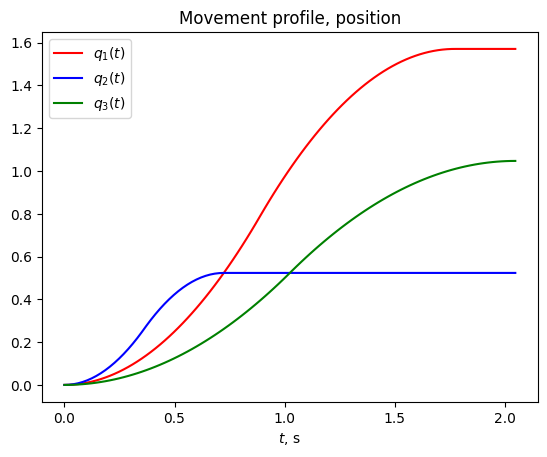

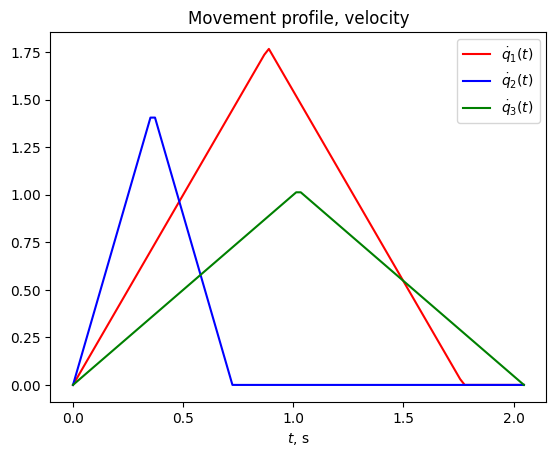

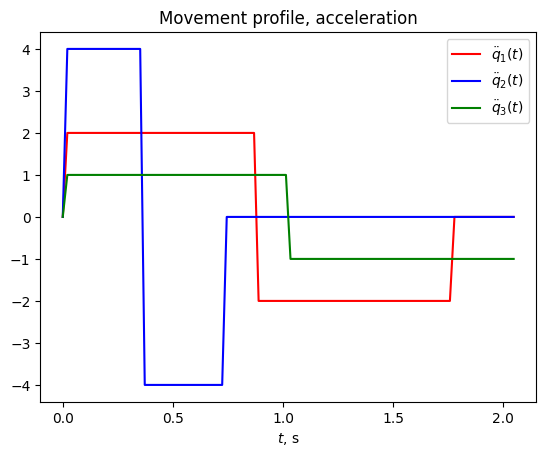

In [301]:
def get_fastest_profile_crit(
    q_1: float, q_2: float, t_1: float, a_max: float
) -> tuple[Callable[[float], tuple[float, float, float]], float]:
    dq = q_2 - q_1
    dt_crit = np.sqrt(np.abs(dq) / a_max)
    a = a_max if dq > 0 else -a_max

    def profile(t: float) -> tuple[float, float, float]:
        if t <= t_1:
            return q_1, 0, 0
        if t <= t_1 + dt_crit:
            return (a / 2) * (t - t_1) ** 2 + q_1, a * (t - t_1), a
        if t <= t_1 + 2 * dt_crit:
            return (
                (-a / 2) * (t - t_1 - 2 * dt_crit) ** 2 + q_2,
                -a * (t - t_1 - 2 * dt_crit),
                -a,
            )
        return q_2, 0, 0

    return profile, t_1 + 2 * dt_crit


def get_fastest_profile(
    q_1: float, q_2: float, t_1: float, a_max: float, v_max: float
) -> tuple[Callable[[float], tuple[float, float, float]], float]:
    assert a_max > 0
    assert v_max > 0
    dt_crit = v_max / a_max
    dq = q_2 - q_1

    if a_max * dt_crit**2 >= abs(dq):
        return get_fastest_profile_crit(q_1, q_2, t_1, a_max)

    dt = (abs(dq) - a_max * dt_crit**2) / v_max
    a = a_max if dq > 0 else -a_max

    def profile(t: float) -> tuple[float, float, float]:
        if t <= t_1:
            return q_1, 0, 0
        if t <= t_1 + dt_crit:
            return (a / 2) * (t - t_1) ** 2 + q_1, a * (t - t_1), a
        if t <= t_1 + dt_crit + dt:
            return v_max * (t - t_1 - dt_crit) + (a / 2) * dt_crit**2 + q_1, v_max, 0
        if t <= t_1 + 2 * dt_crit + dt:
            return (
                (-a / 2) * (t - t_1 - 2 * dt_crit - dt) ** 2 + q_2,
                -a * (t - t_1 - 2 * dt_crit - dt),
                -a,
            )
        return q_2, 0, 0

    return profile, t_1 + 2 * dt_crit + dt


def get_max_acc_profile(
    q_1: float, q_2: float, t_1: float, t_2: float, a_max: float
) -> Callable[[float], float]:
    assert a_max > 0
    assert t_1 < t_2
    dq = np.abs(q_2 - q_1)
    t = t_2 - t_1

    assert (a_max * t) ** 2 - 4 * a_max * dq > -1e-3
    if (a_max * t) ** 2 - 4 * a_max * dq > 0:
        v_max_1 = (a_max * t - np.sqrt((a_max * t) ** 2 - 4 * a_max * dq)) / 2
        v_max_2 = (a_max * t + np.sqrt((a_max * t) ** 2 - 4 * a_max * dq)) / 2
        v_max = min(v_max_1, v_max_2)
    else:
        v_max = a_max * t / 2

    return get_fastest_profile(q_1, q_2, t_1, a_max, v_max)[0]


def draw_fastest_path(sync: bool = False):
    profile_1, t_1 = get_fastest_profile(0, np.pi / 2, 0, 2, 5)
    profile_2, t_2 = get_fastest_profile(0, np.pi / 6, 0, 4, 4)
    profile_3, t_3 = get_fastest_profile(0, np.pi / 3, 0, 1, 3)
    t = max(t_1, t_2, t_3)

    if sync:
        profile_1 = get_max_acc_profile(0, np.pi / 2, 0, t, 2)
        profile_2 = get_max_acc_profile(0, np.pi / 6, 0, t, 4)
        profile_3 = get_max_acc_profile(0, np.pi / 3, 0, t, 1)

    draw_path(
        np.linspace(0, t, 100),
        [profile_1, profile_2, profile_3],
    )


# Without synchronization
draw_fastest_path()

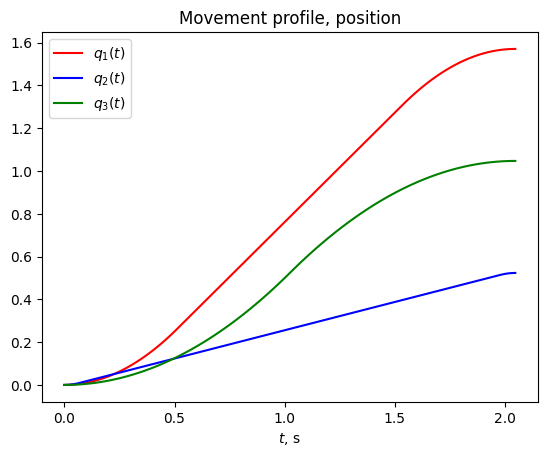

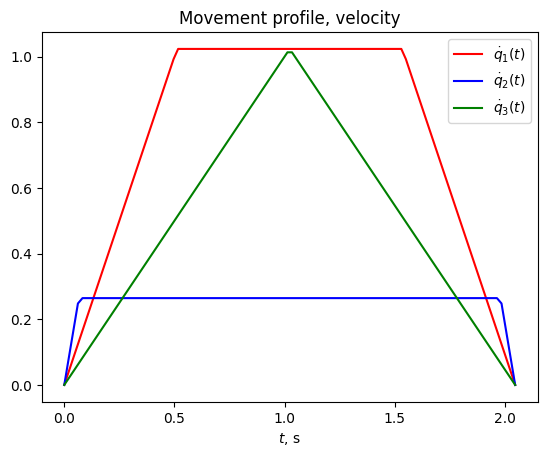

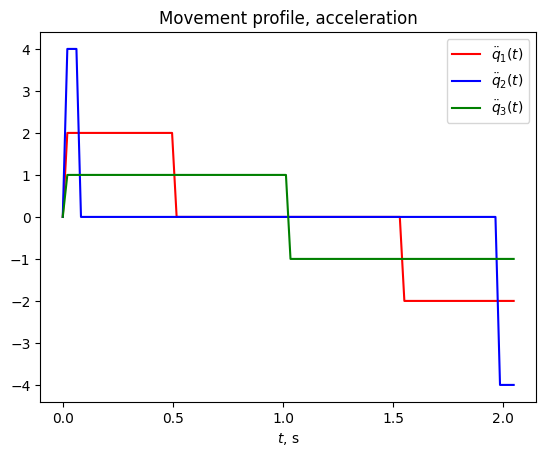

In [302]:
# With synchronization 
draw_fastest_path(sync=True)

## Task 4

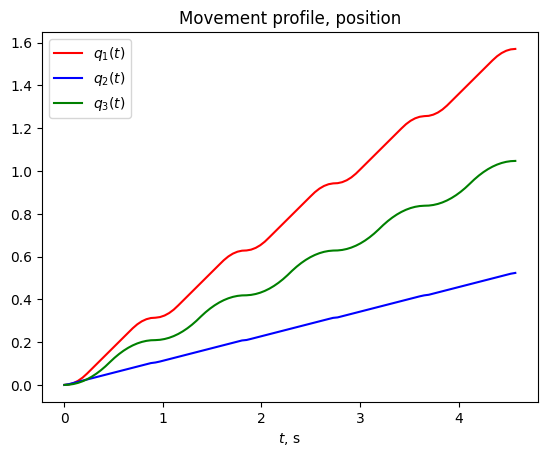

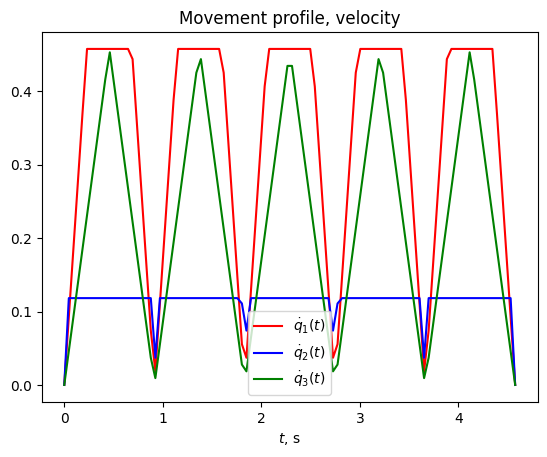

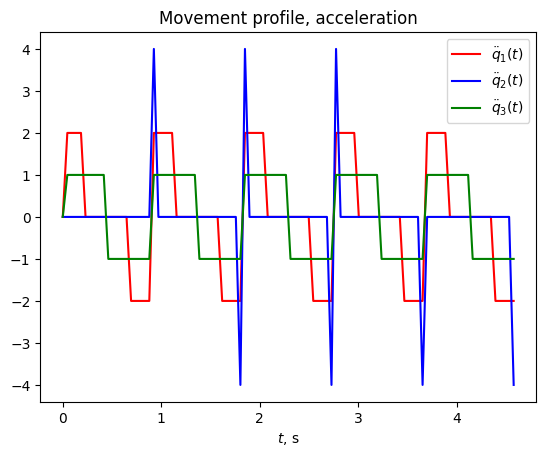

In [303]:
def combine_profiles(
    profiles: list[Callable[[float], tuple[float, float, float]]],
    t_knots: np.ndarray,
) -> Callable[[float], tuple[float, float, float]]:
    assert len(profiles) + 1 == len(t_knots)
    t_min = t_knots.min()

    def profile(t: float) -> tuple[float, float, float]:
        if t <= t_min:
            return profiles[0](t)
        for t_knot, profile in zip(t_knots[1:], profiles):
            if t <= t_knot:
                return profile(t)
        return profiles[-1](t)

    return profile


def get_knots_profiles(
    q_knots: np.ndarray,
) -> tuple[np.ndarray, list[Callable[[float], tuple[float, float, float]]]]:
    profiles_1 = []
    profiles_2 = []
    profiles_3 = []

    t_knots = [0]
    for i, q in enumerate(q_knots[1:]):
        _, t_1 = get_fastest_profile(q_knots[i, 0], q[0], t_knots[i], 2, 5)
        _, t_2 = get_fastest_profile(q_knots[i, 1], q[1], t_knots[i], 4, 4)
        _, t_3 = get_fastest_profile(q_knots[i, 2], q[2], t_knots[i], 1, 3)
        t = max(t_1, t_2, t_3)
        profiles_1.append(get_max_acc_profile(q_knots[i, 0], q[0], t_knots[i], t, 2))
        profiles_2.append(get_max_acc_profile(q_knots[i, 1], q[1], t_knots[i], t, 4))
        profiles_3.append(get_max_acc_profile(q_knots[i, 2], q[2], t_knots[i], t, 1))
        t_knots.append(t)
    t_knots = np.array(t_knots)

    return t_knots, [
        combine_profiles(profiles_1, t_knots),
        combine_profiles(profiles_2, t_knots),
        combine_profiles(profiles_3, t_knots),
    ]


def draw_multi_point_path(n: int, q_end: list[float]):
    q_knots = np.c_[
        np.linspace(0, q_end[0], n + 2),
        np.linspace(0, q_end[1], n + 2),
        np.linspace(0, q_end[2], n + 2),
    ]
    t_knots, profiles = get_knots_profiles(q_knots)
    draw_path(
        np.linspace(t_knots[0], t_knots[-1], 100),
        profiles,
    )


draw_multi_point_path(4, [np.pi / 2, np.pi / 6, np.pi / 3])

## Task 5-6

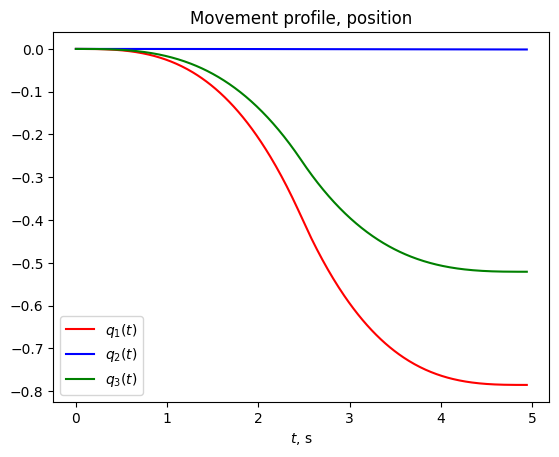

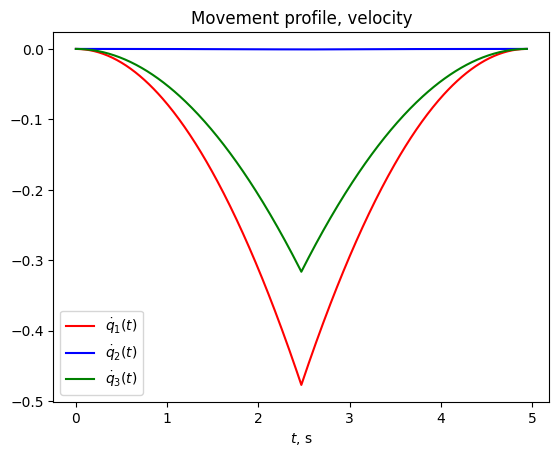

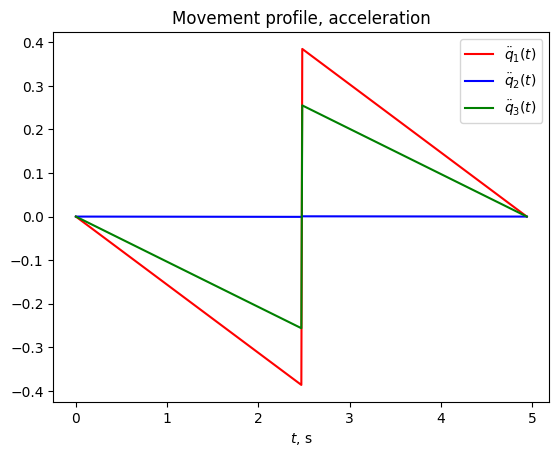

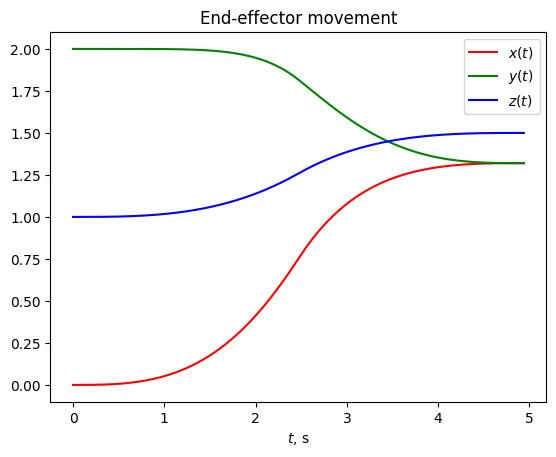

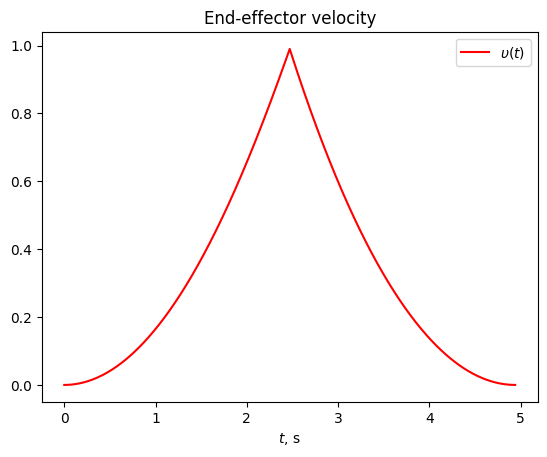

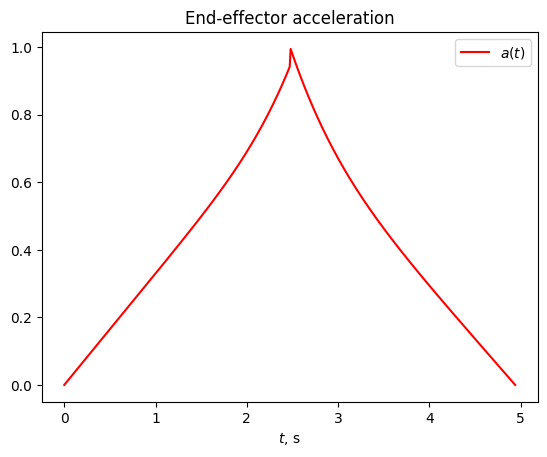

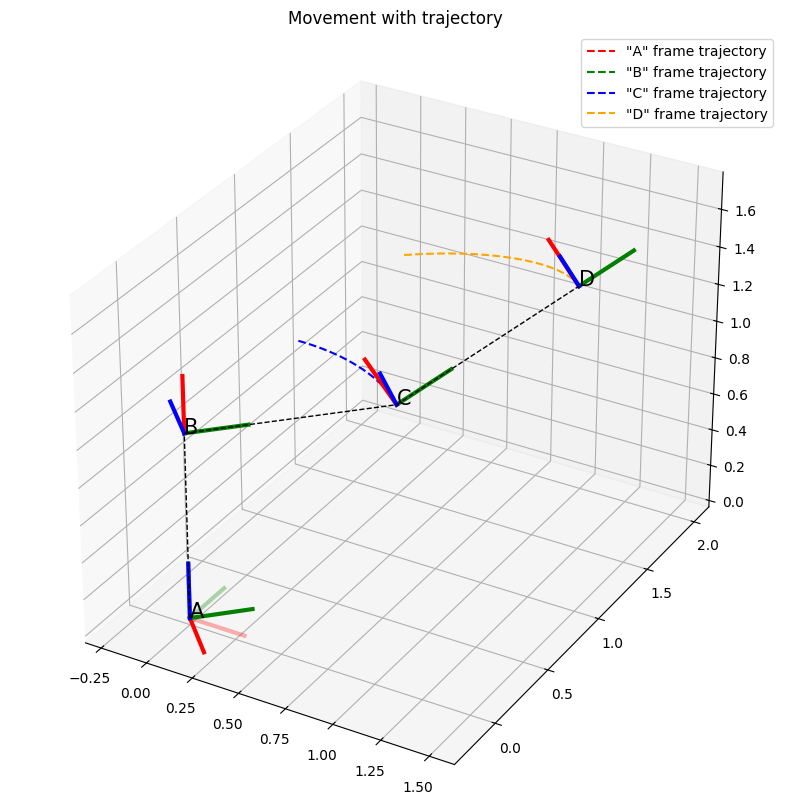

In [304]:
def get_d_jac_vel_anl_4(
    q_1: float, q_2: float, q_3: float, dq_1: float, dq_2: float, dq_3: float
) -> np.ndarray:
    return np.array(
        [
            [
                -(-L_2 * dq_2 * np.sin(q_2) - L_3 * (dq_2 + dq_3) * np.sin(q_2 + q_3))
                * np.cos(q_1)
                + dq_1 * (L_2 * np.cos(q_2) + L_3 * np.cos(q_2 + q_3)) * np.sin(q_1),
                (L_2 * dq_2 * np.cos(q_2) + L_3 * (dq_2 + dq_3) * np.cos(q_2 + q_3))
                * np.sin(q_1)
                + dq_1 * (L_2 * np.sin(q_2) + L_3 * np.sin(q_2 + q_3)) * np.cos(q_1),
                L_3 * dq_1 * np.cos(q_1) * np.sin(q_2 + q_3)
                + L_3 * np.sin(q_1) * (dq_2 + dq_3) * np.cos(q_2 + q_3),
            ],
            [
                -(-L_2 * dq_2 * np.sin(q_2) - L_3 * (dq_2 + dq_3) * np.sin(q_2 + q_3))
                * np.sin(q_1)
                - dq_1 * (L_2 * np.cos(q_2) + L_3 * np.cos(q_2 + q_3)) * np.cos(q_1),
                -(L_2 * dq_2 * np.cos(q_2) + L_3 * (dq_2 + dq_3) * np.cos(q_2 + q_3))
                * np.cos(q_1)
                + dq_1 * (L_2 * np.sin(q_2) + L_3 * np.sin(q_2 + q_3)) * np.sin(q_1),
                -L_3 * (dq_2 + dq_3) * np.cos(q_2 + q_3) * np.cos(q_1)
                + dq_1 * L_3 * np.sin(q_2 + q_3) * np.sin(q_1),
            ],
            [
                0,
                L_2 * dq_2 * np.sin(q_2) + L_3 * (dq_2 + dq_3) * np.sin(q_2 + q_3),
                L_3 * (dq_2 + dq_3) * np.sin(q_2 + q_3),
            ],
        ]
    )


def get_vel(qs: np.ndarray, vs: np.ndarray) -> float:
    return np.linalg.norm(get_jac_anl_4(*qs)[:3] @ vs)


def get_acc(qs: np.ndarray, vs: np.ndarray, acs: np.ndarray) -> float:
    return np.linalg.norm(
        get_jac_anl_4(*qs)[:3] @ acs + get_d_jac_vel_anl_4(*qs, *vs) @ vs
    )


def try_profile(
    a_max: float,
    v_max: float,
    q_0: np.ndarray,
    q_1: np.ndarray,
    t_probe: float,
    dt: float,
) -> tuple[bool, Optional[np.ndarray], Optional[np.ndarray], Optional[np.ndarray]]:
    profiles = [
        get_jerk_profile(0, t_probe, q_0[0], q_1[0]),
        get_jerk_profile(0, t_probe, q_0[1], q_1[1]),
        get_jerk_profile(0, t_probe, q_0[2], q_1[2]),
    ]
    qs = []
    vs = []
    acs = []
    for t in np.arange(0, t_probe, dt):
        state = np.array([p(t) for p in profiles]).T
        if get_acc(state[0], state[1], state[2]) > a_max:
            return False, None, None, None
        if get_vel(state[0], state[1]) > v_max:
            return False, None, None, None
        qs.append(state[0])
        vs.append(state[1])
        acs.append(state[2])
    return True, np.array(qs), np.array(vs), np.array(acs)


def find_optimal_profile(
    a_max: float,
    v_max: float,
    q_0: np.ndarray,
    q_1: np.ndarray,
    dt: float,
    epsilon: float = 1e-4,
) -> tuple[float, np.ndarray, np.ndarray, np.ndarray]:
    lo = 0.0
    hi = 1.0
    while not try_profile(a_max, v_max, q_0, q_1, hi, dt)[0]:
        hi *= 2
    while hi - lo > epsilon:
        mid = (hi + lo) / 2
        res, _, _, _ = try_profile(a_max, v_max, q_0, q_1, mid, dt)
        if res:
            hi = mid
        else:
            lo = mid
    return hi, np.array(try_profile(a_max, v_max, q_0, q_1, hi, dt)[1:])


def move(
    p_1: np.ndarray,
    p_2: np.ndarray,
    a_max: float,
    v_max: float,
    dt: float = 1e-2,
    epsilon: float = 1e-4,
):
    back_qs_1 = backward(p_1)
    back_qs_2 = backward(p_2)

    q_0 = back_qs_1[0]
    q_1 = back_qs_2[0]
    min_d = np.linalg.norm(q_0 - q_1)
    for q_i in back_qs_1:
        for q_j in back_qs_2:
            if np.linalg.norm(q_i - q_j) < min_d:
                q_0 = q_i
                q_1 = q_j
                min_d = np.linalg.norm(q_i - q_j)

    t, qs = find_optimal_profile(a_max, v_max, q_0, q_1, dt, epsilon)
    t_span = np.arange(0, t, dt)

    # Plot profiles
    suffixes = ["position", "velocity", "acceleration"]
    q_prefixes = ["q", "\dot{q}", "\ddot{q}"]
    for i, (suffix, prefix) in enumerate(zip(suffixes, q_prefixes)):
        plt.title(f"Movement profile, {suffix}")
        plt.plot(t_span, qs[i, :, 0], color="r", label=f"${prefix}_1(t)$")
        plt.plot(t_span, qs[i, :, 1], color="b", label=f"${prefix}_2(t)$")
        plt.plot(t_span, qs[i, :, 2], color="g", label=f"${prefix}_3(t)$")
        plt.legend(loc="best")
        plt.xlabel("$t$, s")
        plt.show()

    # Plot positions
    ts = []
    for q in qs[0]:
        ts.append(forward(q))
    ts = np.array(ts)
    
    trajectories = []
    trajectories_colors = ["r", "g", "b", "orange"]
    trajectories_names = list("ABCD")
    for i in range(4):
        trajectories.append(ts[:, i, :3, 3])

    plt.title(f'End-effector movement')
    plt.plot(t_span, trajectories[-1][:, 0], color="r", label="$x(t)$")
    plt.plot(t_span, trajectories[-1][:, 1], color="g", label="$y(t)$")
    plt.plot(t_span, trajectories[-1][:, 2], color="b", label="$z(t)$")
    plt.legend(loc="best")
    plt.xlabel("$t$, s")
    plt.show()

    vels = [get_vel(q, v) for q, v in zip(qs[0], qs[1])]
    plt.title(f'End-effector velocity')
    plt.plot(t_span, vels, color="r", label="$\\upsilon(t)$")
    plt.legend(loc="best")
    plt.xlabel("$t$, s")
    plt.show()

    acs = [get_acc(q, v, a) for q, v, a in zip(qs[0], qs[1], qs[2])]
    plt.title(f'End-effector acceleration')
    plt.plot(t_span, acs, color="r", label="$a(t)$")
    plt.legend(loc="best")
    plt.xlabel("$t$, s")
    plt.show()

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection="3d")
    ax.set_title("Movement with trajectory")
    for trj, c, name in zip(trajectories, trajectories_colors, trajectories_names):
        ax.plot(
            trj[:, 0],
            trj[:, 1],
            trj[:, 2],
            "--",
            color=c,
            label=f'"{name}" frame trajectory',
        )
    plot_configuration(ts[-1], ax=ax)
    ax.legend(loc="best")
    plt.show()


move(
    np.array([0, 2, 1], dtype=float),
    np.array([1.32, 1.32, 1.5], dtype=float),
    a_max=1,
    v_max=1,
)